In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load and inspect the dataset
data = pd.read_excel(r"C:\Users\SISTLA RAHUL\Desktop\cs_embed_data.xlsx")
print(data.head())
print(data.info())
print(data.describe())

# Preprocessing: assuming 'Final_Marks' is the target column
X = data.drop(columns=['Final_Marks'])  # Drop the target column
y = (data['Final_Marks'] > 5).astype(int)  # Binary classification based on a threshold (adjust as needed)

# Add bias term to inputs
X_bias = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones for bias


   cs_embedding_0  cs_embedding_1  cs_embedding_2  cs_embedding_3  \
0       -1.352622        0.740384        1.695514       -0.497450   
1       -1.420214        0.797539        1.748847       -0.571881   
2       -1.368913        0.746200        1.696837       -0.494724   
3       -1.325860        0.712805        1.688298       -0.446775   
4       -1.397093        0.710151        1.714250       -0.499318   

   cs_embedding_4  cs_embedding_5  cs_embedding_6  cs_embedding_7  \
0       -0.253905        0.353409       -1.814524       -0.696089   
1       -0.252812        0.339780       -1.854765       -0.762319   
2       -0.272788        0.368430       -1.816878       -0.685659   
3       -0.250683        0.383207       -1.807236       -0.798903   
4       -0.246139        0.346471       -1.803934       -0.688617   

   cs_embedding_8  cs_embedding_9  ...  cs_embedding_759  cs_embedding_760  \
0        0.060398       -0.253734  ...         -1.643903          0.339702   
1        0.020

In [2]:
class Perceptron:
    def __init__(self, weights, learning_rate):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate

    def summation_unit(self, inputs):
        return np.dot(inputs, self.weights)

    def step_activation(self, x):
        return 1 if x >= 0 else 0

    def bipolar_step_activation(self, x):
        return 1 if x >= 0 else -1

    def sigmoid_activation(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh_activation(self, x):
        return np.tanh(x)

    def relu_activation(self, x):
        return max(0, x)

    def leaky_relu_activation(self, x, alpha=0.01):
        return x if x >= 0 else alpha * x

    def comparator(self, prediction, target):
        return target - prediction

    def train(self, inputs, targets, activation_function, max_epochs=1000, error_threshold=0.002):
        errors = []
        epochs = 0

        for epoch in range(max_epochs):
            total_error = 0
            for input_vector, target in zip(inputs, targets):
                summation = self.summation_unit(input_vector)
                output = activation_function(summation)
                error = self.comparator(output, target)
                self.weights += self.learning_rate * error * np.array(input_vector)
                total_error += error ** 2
           
            errors.append(total_error)
            epochs += 1

            if total_error <= error_threshold:
                break

        return epochs, errors

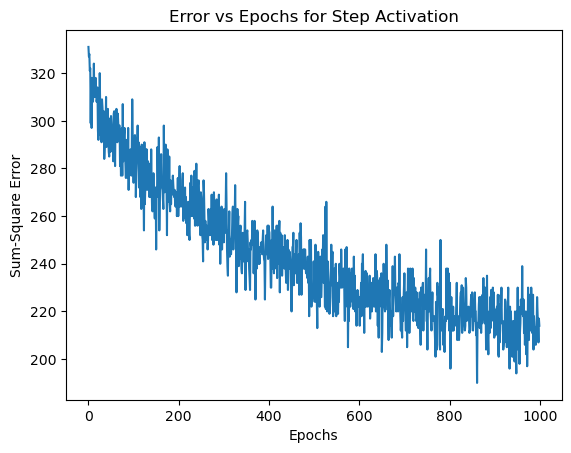

In [3]:
# A1: Train Perceptron with Step Activation
initial_weights = np.random.randn(X.shape[1] + 1)
learning_rate = 0.05

perceptron = Perceptron(weights=initial_weights, learning_rate=learning_rate)
epochs, errors = perceptron.train(X_bias, y, perceptron.step_activation)

# Plot Error vs. Epochs
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error vs Epochs for Step Activation')
plt.show()

C:\Users\SISTLA RAHUL\AppData\Local\Temp\ipykernel_22296\2365146220.py:41: RuntimeWarning: overflow encountered in scalar power
  total_error += error ** 2


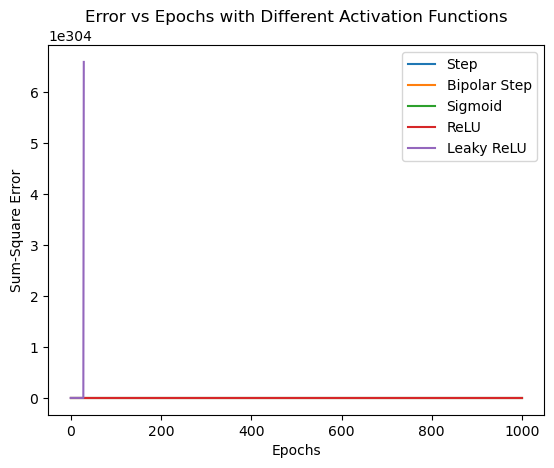

In [4]:
# A2: Repeat with Bipolar Step, Sigmoid, ReLU, and Leaky ReLU Functions
activation_functions = {
    "Step": perceptron.step_activation,
    "Bipolar Step": perceptron.bipolar_step_activation,
    "Sigmoid": perceptron.sigmoid_activation,
    "ReLU": perceptron.relu_activation,
    "Leaky ReLU": perceptron.leaky_relu_activation
}

results = {}
for name, func in activation_functions.items():
    perceptron = Perceptron(weights=initial_weights, learning_rate=learning_rate)
    epochs, errors = perceptron.train(X_bias, y, func)
    results[name] = {"epochs": epochs, "errors": errors}

    # Plot Error vs. Epochs for each activation function
    plt.plot(range(epochs), errors, label=name)

plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error vs Epochs with Different Activation Functions')
plt.legend()
plt.show()

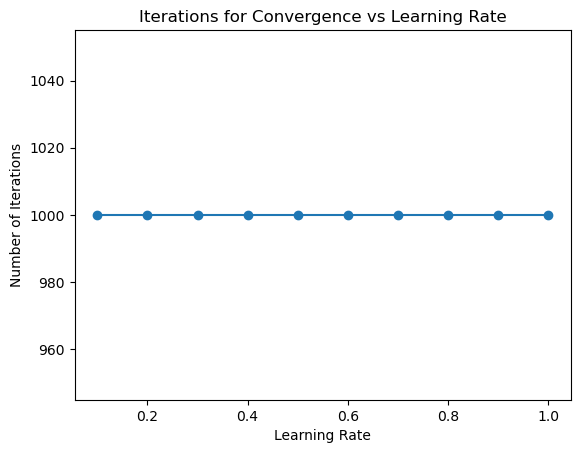

In [5]:
# A3,A4: Repeat with Different Learning Rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
results_lr = {}
for lr in learning_rates:
    perceptron = Perceptron(weights=initial_weights, learning_rate=lr)
    epochs, errors = perceptron.train(X_bias, y, perceptron.step_activation)
    results_lr[lr] = {"epochs": epochs, "errors": errors}

# Plot Number of Iterations for Different Learning Rates
iterations = [results_lr[lr]['epochs'] for lr in learning_rates]
plt.plot(learning_rates, iterations, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Iterations for Convergence vs Learning Rate')
plt.show()

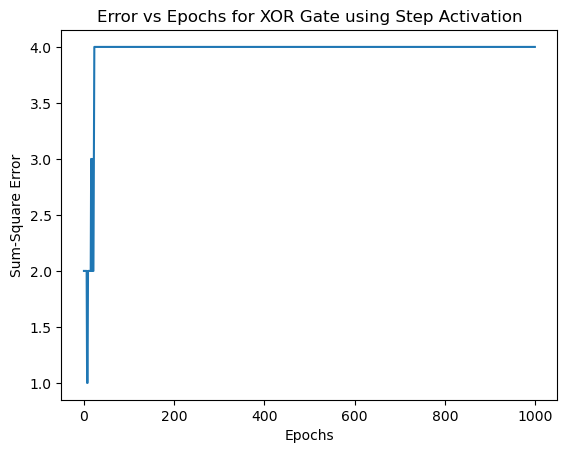

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define XOR logic input and output
X_xor = np.array([
    [1, 0, 0],  # Bias term + Input 1 + Input 2
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])
y_xor = np.array([0, 1, 1, 0])

# Initialize weights for 3 features (including bias)
initial_weights = np.random.rand(3)  # Adjust the size to match the input features
learning_rate = 0.05

# Perceptron class (as defined before)
class Perceptron:
    def __init__(self, weights, learning_rate):
        self.weights = weights
        self.learning_rate = learning_rate

    def summation_unit(self, inputs):
        return np.dot(inputs, self.weights)

    def step_activation(self, x):
        return 1 if x >= 0 else 0

    def train(self, inputs, targets, activation_function, max_epochs=1000, error_threshold=0.002):
        errors = []
        epochs = 0

        for epoch in range(max_epochs):
            total_error = 0
            for input_vector, target in zip(inputs, targets):
                summation = self.summation_unit(input_vector)
                output = activation_function(summation)
                error = target - output
                self.weights += self.learning_rate * error * input_vector
                total_error += error ** 2

            errors.append(total_error)
            epochs += 1

            if total_error <= error_threshold:
                break

        return epochs, errors

# Create and train the Perceptron model
perceptron = Perceptron(weights=initial_weights, learning_rate=learning_rate)
epochs_xor, errors_xor = perceptron.train(X_xor, y_xor, perceptron.step_activation)

# Plot Error vs. Epochs for XOR Gate
plt.plot(range(epochs_xor), errors_xor)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error vs Epochs for XOR Gate using Step Activation')
plt.show()


C:\Users\SISTLA RAHUL\AppData\Local\Temp\ipykernel_22296\2365146220.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


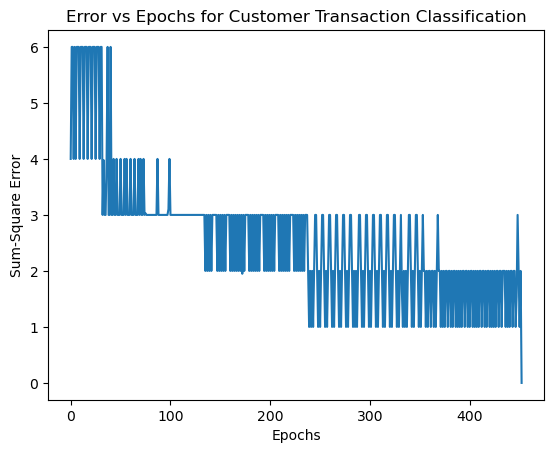

Accuracy on customer data: 100.00%


In [7]:
# A6: Build a Perceptron to Classify Customer Transactions
customer_data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk_Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High_Value_Tx': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
}

df_customer = pd.DataFrame(customer_data)

# Features and target
X_customer = df_customer.drop(columns=['High_Value_Tx'])
y_customer = df_customer['High_Value_Tx']

# Add bias term to inputs
X_customer_bias = np.c_[np.ones(X_customer.shape[0]), X_customer]

# Initialize weights and learning rate
initial_weights_customer = np.random.randn(X_customer_bias.shape[1])
learning_rate_customer = 0.1

# Train Perceptron with Sigmoid Activation
perceptron_customer = Perceptron(weights=initial_weights_customer, learning_rate=learning_rate_customer)
epochs_customer, errors_customer = perceptron_customer.train(X_customer_bias, y_customer, perceptron_customer.sigmoid_activation)

# Plot Error vs. Epochs for Customer Data
plt.plot(range(epochs_customer), errors_customer)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error vs Epochs for Customer Transaction Classification')
plt.show()

# Predict on the customer data
customer_predictions = [perceptron_customer.sigmoid_activation(perceptron_customer.summation_unit(x)) > 0.5 for x in X_customer_bias]
customer_accuracy = np.mean(customer_predictions == y_customer)
print(f"Accuracy on customer data: {customer_accuracy * 100:.2f}%")

In [8]:
# A7: Compare Results with Matrix Pseudo-Inverse
pseudo_inverse_weights = np.linalg.pinv(X_bias).dot(y)
y_pred_pseudo = np.dot(X_bias, pseudo_inverse_weights) > 0.5

In [15]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define AND gate input and output
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1])  # AND gate output

# Create and train an MLPClassifier for AND gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.05, max_iter=1000)

# Train the neural network
mlp_and.fit(X_and, y_and)

# Predict and print the results for the AND gate
y_pred_and = mlp_and.predict(X_and)
print(f"Predicted Output: {y_pred_and}")
print(f"Actual Output: {y_and}")

# Calculate the accuracy
accuracy_and = mlp_and.score(X_and, y_and)
print(f"Accuracy on AND gate: {accuracy_and * 100:.2f}%")


Predicted Output: [0 0 0 1]
Actual Output: [0 0 0 1]
Accuracy on AND gate: 100.00%


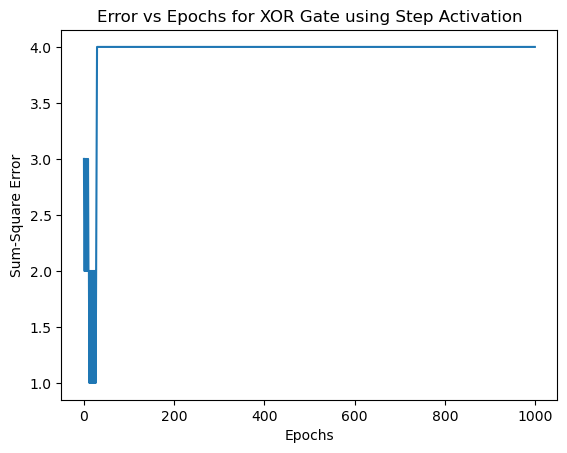

In [10]:
# A9: Repeat the A1 experiment for XOR Gate logic
X_xor = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])
y_xor = np.array([0, 1, 1, 0])

# Initialize Perceptron with the same learning rate and Step activation function
initial_weights = np.random.randn(X_xor.shape[1])
learning_rate = 0.05

perceptron_xor = Perceptron(weights=initial_weights, learning_rate=learning_rate)
epochs_xor, errors_xor = perceptron_xor.train(X_xor, y_xor, perceptron_xor.step_activation)

# Plot Error vs. Epochs for XOR Gate
plt.plot(range(epochs_xor), errors_xor)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error vs Epochs for XOR Gate using Step Activation')
plt.show()

In [11]:
# A10: Train MLP Network for XOR Gate Logic with 2 Output Nodes
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.05, max_iter=1000)
mlp_xor.fit(X_xor, y_xor)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,),
              learning_rate_init=0.05, max_iter=1000)

In [12]:
# A11: Use MLPClassifier for AND and XOR Gates and Dataset Classification
# For AND Gate
mlp_and_sklearn = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
mlp_and_sklearn.fit(X_xor, y_xor)

# For XOR Gate
mlp_xor_sklearn = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
mlp_xor_sklearn.fit(X_xor, y_xor)

# For the Dataset
mlp_data_sklearn = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', max_iter=1000)
mlp_data_sklearn.fit(X, y)

# Predict on the dataset and calculate accuracy
y_pred = mlp_data_sklearn.predict(X)
accuracy = np.mean(y_pred == y)
print(f"Accuracy on dataset: {accuracy * 100:.2f}%")

Accuracy on dataset: 87.07%


In [13]:
# A12: Use the MLPClassifier() function on your project dataset
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlp_data = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', max_iter=1000)
mlp_data.fit(X_train, y_train)

y_pred_train = mlp_data.predict(X_train)
y_pred_test = mlp_data.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy on dataset: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy on dataset: {test_accuracy * 100:.2f}%")

Training Accuracy on dataset: 80.32%
Testing Accuracy on dataset: 74.79%
